## Welcome to the AI-ML-Jupyter-Notebooks repository! 
### This guide will help you navigate and learn Data Pre-Processing and Cleaning using an Example Dataset.
---

#### Make sure to inastall necessary dependencies by running this command :

pip install -r requirements.txt

---

### Details of Dataset :  
#### Contains Values obtained from certain sensors inside a machine and task is to predict if the machine will fail at certain resdings from those sensors. Hence, it is important to clean the data and extract the most relevant information from it.
##### Source of Dataset : https://github.com/iSiddharth20/Predictive-Analysis-for-Machine-Faliure
---

# Importing Libraries

In [1]:
# Basic File handling
import pandas as pd
import numpy as np

# Import Data from URL
import io
import requests

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Pre-Processing
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

# Splitting data for Model Training
from sklearn.model_selection import train_test_split 

# Training Model
from sklearn.ensemble import RandomForestClassifier
# Random Forest Classifier was chosen because it was most Accurate

# Model Evaluation : Accuracy Score
from sklearn.metrics import accuracy_score

# Export Trained Model as *.pkl
import joblib

# Data Pre-Processing
---


In [2]:
# Getting the Data Set in the Program using URL
url = 'https://raw.githubusercontent.com/iSiddharth20/Predictive-Analysis-for-Machine-Faliure/master/dataset.csv'
s = requests.get(url).content
data = pd.read_csv(io.StringIO(s.decode('utf-8')))


# Getting the Data Set in the Program using a local CSV File
source = '../../../data/dataset_datacleaning.csv'
data = pd.read_csv(source)

---
#### Identifing and Removing Null Values from : Pressure , Moisture , Temperature , Broken
---

In [3]:
# Identifing Null Values from "Pressure"
data[data['pressureInd'].isnull()]

,Random,Machine_nbr,lifetime,pressureInd,moistureInd,temperatureInd,team,provider,broken
29,0.208998,350,41,NaN,81.576619,127.597829,3,2,No
67,0.807607,396,72,NaN,102.418595,97.143731,2,2,No
450,0.552764,289,61,NaN,NaN,85.154566,3,1,No
489,0.408711,945,66,NaN,NaN,135.169317,2,1,Yes
622,0.231253,983,63,NaN,98.237506,NaN,2,3,Yes


In [4]:
# Identifing Null Values from "Moisture"
data[data['moistureInd'].isnull()]

,Random,Machine_nbr,lifetime,pressureInd,moistureInd,temperatureInd,team,provider,broken
19,0.793356,907,65,86.499784,NaN,92.645987,2,3,Yes
243,0.569958,71,46,87.636028,NaN,114.600177,2,4,No
450,0.552764,289,61,NaN,NaN,85.154566,3,1,No
489,0.408711,945,66,NaN,NaN,135.169317,2,1,Yes


In [5]:
# Identifing Null Values from "Temperature"
data[data['temperatureInd'].isnull()]

,Random,Machine_nbr,lifetime,pressureInd,moistureInd,temperatureInd,team,provider,broken
49,0.333839,73,93,87.738554,100.043591,NaN,1,3,No
92,0.476000,17,80,92.483469,92.383153,NaN,2,1,Yes
622,0.231253,983,63,NaN,98.237506,NaN,2,3,Yes


In [6]:
# Identifing Null Values from "Broken"
data[data['broken'].isnull()]

,Random,Machine_nbr,lifetime,pressureInd,moistureInd,temperatureInd,team,provider,broken
9,0.923187,140,79,87.421990,110.941574,129.691510,2,1,NaN
181,0.609019,927,92,116.740412,104.204599,129.384729,1,2,NaN
536,0.747285,315,12,69.807790,83.670698,82.236458,1,2,NaN
659,0.787838,36,80,111.991442,106.257524,110.334142,2,1,NaN


In [7]:
# Removing all the Null Values and Resetting Index of the Data Frame
data.dropna(inplace=True)
data.reset_index(inplace=True)
data.drop(columns=['index'],axis=1,inplace=True)

In [8]:
# First 5 Rows of the Data
data.head()

,Random,Machine_nbr,lifetime,pressureInd,moistureInd,temperatureInd,team,provider,broken
0,0.437420,723,60,77.836105,112.832544,121.786371,3,3,Yes
1,0.688345,107,88,89.350620,95.228125,99.082317,1,4,Yes
2,0.805670,153,30,130.089477,96.367747,103.608344,1,3,No
3,0.923187,140,79,87.421990,110.941574,129.691510,2,1,Yes
4,0.036583,359,2,69.939898,86.292387,91.861983,3,3,No


In [9]:
# Check for Null Values
data.isnull().sum()

Random            0
Machine_nbr       0
lifetime          0
pressureInd       0
moistureInd       0
temperatureInd    0
team              0
provider          0
broken            0
dtype: int64

***
* Observations :
Filling the Null Values with Mean reduced the Accuracy. Hence, those entries were Dropped.
***

---
#### Identifying and Removing Outliers
---

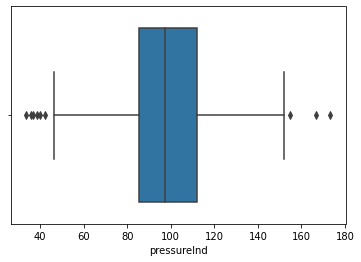

In [10]:
# Identify Outliers from column 'Pressure'
sns.boxplot(x = data['pressureInd'])

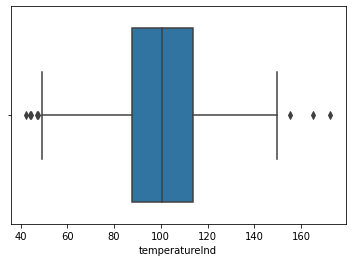

In [11]:
# Identify Outliers from column 'Temperature'
sns.boxplot(x = data['temperatureInd'])

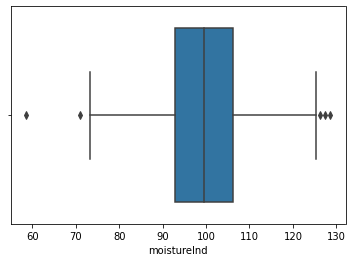

In [12]:
# Identify Outliers from column 'Moisture'
sns.boxplot(x = data['moistureInd'])

In [13]:
'''
Removing Outliers using InterQuartile Range
Q1 : First Quartile
Q2 : Second Quartile
IQR : Inter Quartile Range

Only data points within the Inter Quartile Range will be stored
'''

# Finding Key Values
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75) 
IQR = Q3 - Q1

# Selecting Valid Data Points
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Resetting Index of Data Frame
data.reset_index(inplace=True)
data.drop(columns=['index'],axis=1,inplace=True)

---
#### Checking for Remaining Outliers
---

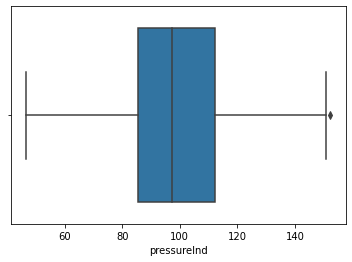

In [14]:
# From column 'Pressure'
sns.boxplot(x = data['pressureInd'])

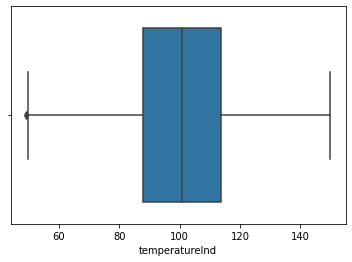

In [15]:
# From column 'Temperature'

sns.boxplot(x = data['temperatureInd'])

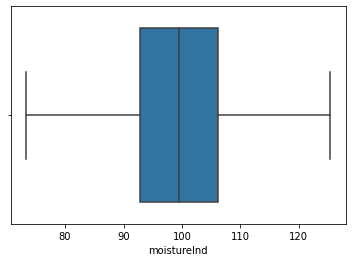

In [16]:
# From column 'Moisture'

sns.boxplot(x = data['moistureInd'])

***
Observations : Removing the Outliers subsequently increased Accuracy 
***

# Data Visualization
---

---
#### Visualizing Distribution of Data Key Factors : Pressure , Moisture , Temperature
---

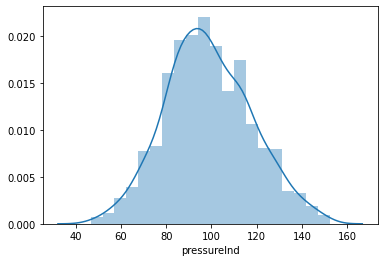

In [17]:
# Distribution Plot of "Pressure"
sns.distplot(data['pressureInd'])

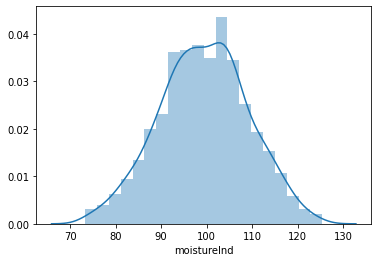

In [18]:
# Distribution Plot of "Moisture"
sns.distplot(data['moistureInd'])

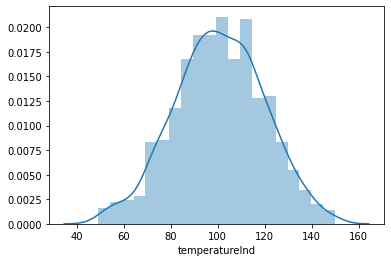

In [19]:
# Distribution Plot of "Temperature"
sns.distplot(data['temperatureInd'])

***
* Observation :
The Data appears to be Normally Distributed which means predictions will be precise
***

---
#### Observing "Yes" vs "No" ratio in Target variable : "Broken"
---

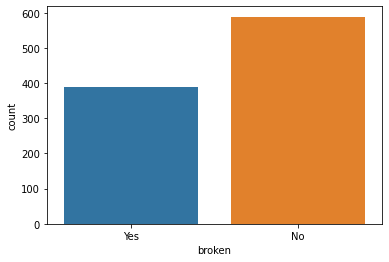

In [20]:
sns.countplot(data=data,x=data['broken'])

***
Observation : There appear to be more 'No' values than 'Yes' Values
***

---
#### Analyzing Dependency of Factors over our Target Variable : State of Machine : "Broken" Using Scatter Plot
---

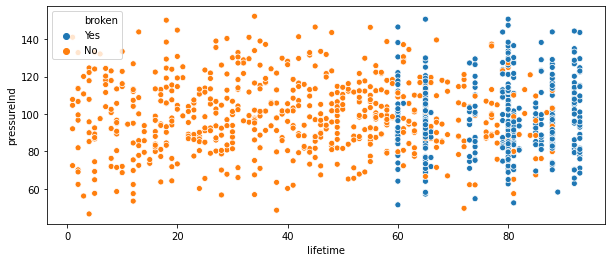

In [21]:
# Pressure and Lifetime
plt.figure(figsize=(10,4))
sns.scatterplot(data=data,x=data['lifetime'],y=data['pressureInd'],hue=data['broken'])

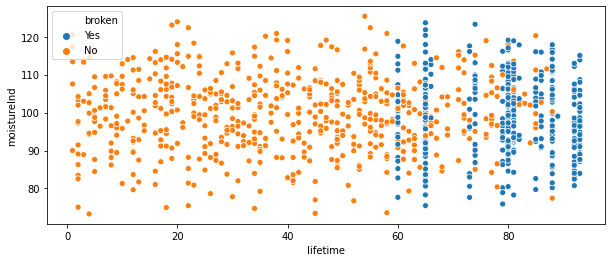

In [22]:
# Moisture and Lifetime
plt.figure(figsize=(10,4))
sns.scatterplot(data=data,x=data['lifetime'],y=data['moistureInd'],hue=data['broken'])

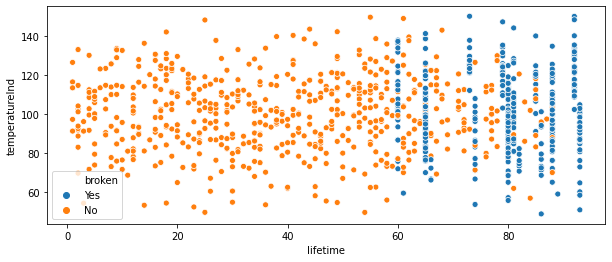

In [23]:
# Temperature and Lifetime
plt.figure(figsize=(10,4))
sns.scatterplot(data=data,x=data['lifetime'],y=data['temperatureInd'],hue=data['broken'])

# Machine Learning Model
---

In [24]:
# Encoding Values to Unique Integers to aid Mathematical Calculations

data['broken'] = label_encoder.fit_transform(data['broken']) 
data['broken'].unique()

array([1, 0])

In [25]:
'''
X : Features and Dependent Variables
y : Target Variable
'''

X = data.drop('broken',axis = 1)
Y = data['broken']

In [26]:
# Splitting the Data for Training and Testing in 70:30 Ratio
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 2)

***
* Observation : Ratio of 70:30 is the most optimum, 80:20 ratio overfitted the model
***

---
#### Fitting and Training the Model
---

In [27]:
model = RandomForestClassifier(max_depth=9, random_state=0)
model.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

***
* Observation : "Random Forest" was chosen over other techniques because it gave maximum Accuracy
* Observation : Maximum Gepth pver 10 overfitted the Model.
***

In [28]:
# Testing the Model
Y_pred = model.predict(X_test)

---
#### Checking Accuracy 
---

In [29]:
acc = round(accuracy_score(Y_test,Y_pred)*100,3)
print('Accuracy : ',acc,' %')

Accuracy :  95.238  %


***
* Observation : Accuracy is always more than 92% , averaging at 95%
***

# Exporting the Trained Model 
---

In [30]:
# Exporting Trained model as 'trained_model.pkl'
joblib.dump(model,"trained_model.pkl")

['trained_model.pkl']